# Chapter 6 - Statistical Modelling and Hypothesis Testing

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
from scipy import stats
from scipy.stats import norm

The loop accumulates probabilities for $ n = 10 $ to $ nt = 100 $.

This is equivalent to calculating:
$$
P(X \geq 10) = \sum_{n=10}^{100} P(X = n)
$$

Where:
- $ P(X \geq 10) $ is the probability of observing 10 or more successes.


The binomial distribution models the number of successes in a fixed number of independent trials, each with the same probability of success.

Here: 

    n=100 (total trials), 
    p=0.05 (probability of success), 
    and binom.pmf(n, 100, 0.05) calculates the probability of exactly 𝑛 successes.

In [5]:
from scipy.stats import binom

alpha = 0                             # Initialize alpha to accumulate probabilities

for n in range(10, 101):              # Loop through values of n from 10 to 100
    alpha += binom.pmf(n, 100, 0.05)  # Add the PMF of binomial distribution to alpha

print(alpha)

0.02818829416341611


    alpha = 0.0282 means there is approximately a 2.82% chance of observing 10 or more successes in 100 trials when p=0.05.

**Suppose a factory produces defective items with a probability of p=0.08. This calculation answers the question: "What is the probability of finding fewer than 10 defective items in a batch of 100?"**

The loop accumulates probabilities for $ n = 0 $ to $ n = 9 $.

This is equivalent to calculating:
$$
P(X < 10) = \sum_{n=0}^{9} P(X = n)
$$

Where:
- $ P(X < 10) $ is the cumulative probability of observing fewer than 10 successes.


In [9]:
beta = 0                                    # Initialize beta to accumulate probabilities

for n in range(0, 10):                      # Loop through values of n from 0 to 9
    bita = binom.pmf(n, 100, 0.08)          # PMF of the binomial distribution for especific n
    print(f'Probability for {n}: {bita}')   # print this value
    beta += bita                            # Add the PMF of the binomial distribution to beta

beta = round(beta*100,2)

print(f'\nTotal probability: {beta}%')

Probability for 0: 0.0002392118746570088
Probability for 1: 0.0020801032578869395
Probability for 2: 0.008953487936122028
Probability for 3: 0.025433096166375672
Probability for 4: 0.05363065930735746
Probability for 5: 0.08953988336532721
Probability for 6: 0.12327954956095778
Probability for 7: 0.1439537597357766
Probability for 8: 0.14551847451551322
Probability for 9: 0.1293497551249005

Total probability: 72.2%


**A factory produces electronic components, and the defect rate is known to be p = 0.05 (5%). In a recent batch of n = 550 components, an inspector found X = 45 defective components. The manager wants to know if this number of defective components is significantly higher than expected or if it could be explained by random chance.**

#### Expected Number of Defects:
The expected number of defective components is:
$$
n \cdot p = 550 \cdot 0.05 = 27.5
$$

#### Z-Score:
The z-score is calculated as:
$$
z_s = \frac{X - n \cdot p}{\sqrt{n \cdot p \cdot (1 - p)}}
$$
This measures how many standard deviations \( X = 45 \) is from the expected mean of defective components.

#### Alpha:
$$
\alpha = 1 - \text{CDF}(z_s)
$$
- $ \alpha $: Calculates the probability of observing $ X = 45 $ or more defects under the assumption that the defect rate is $ p = 0.05 $.
- If $ \alpha $ is small (e.g., less than 0.05), it suggests that the defect rate may be higher than 5%.

In [12]:
X = 45    # Observed number of successes
n = 550   # Total number of trials
p = 0.05  # Probability of success in a single trial

zs = (X - n * p) / np.sqrt(n * p * (1 - p))  # Calculate the z-score for the observed value
alpha = 1 - norm.cdf(zs)                     # Compute the upper-tail probability (alpha)

print(alpha)

0.0003087467117317555


In [13]:
# Another way

print(norm.sf(zs))  # Shortcut in Python, sf = 1 - cdf

0.0003087467117317515


    The value of alpha = 0.00031 (approximately) means that the probability of observing 45 or more defective components in 550 trials, assuming the defect rate is 5% (p=0.05), is 0.031%.

**A company wants to test whether the mean weight of a product is significantly different from the target value of 50 grams (population mean). Sample mean = 50.5; standard deviation of the population = 1.2; sample size = 30. They use a two-tailed hypothesis test with a significance level of α = 0.05.**

In [16]:
# Parameters for the hypothesis test
alpha = 0.05                       # Significance level for a two-tailed test

# Calculate the critical z-scores for the two-tailed test
z_lower = norm.ppf(alpha / 2)      # Lower critical z-score (left tail)
z_upper = norm.ppf(1 - alpha / 2)  # Upper critical z-score (right tail)

# Print the critical z-scores
print(f"Critical Z-Score (Lower): {z_lower:.2f}")
print(f"Critical Z-Score (Upper): {z_upper:.2f}\n")


# Observed z-score
mu = 50          # Population mean
x_bar = 50.5     # Sample mean
sigma = 1.2      # Statndard deviation of the population
n = 30           # Sample size
observed_z = (x_bar - mu) / (sigma / sqrt(n))


if observed_z < z_lower or observed_z > z_upper:
    print(f"The observed z-score ({observed_z:.2f}) is in the rejection region. Reject the null hypothesis.")
else:
    print(f"The observed z-score ({observed_z:.2f}) is NOT in the rejection region. Fail to reject the null hypothesis.")

Critical Z-Score (Lower): -1.96
Critical Z-Score (Upper): 1.96

The observed z-score (2.28) is in the rejection region. Reject the null hypothesis.


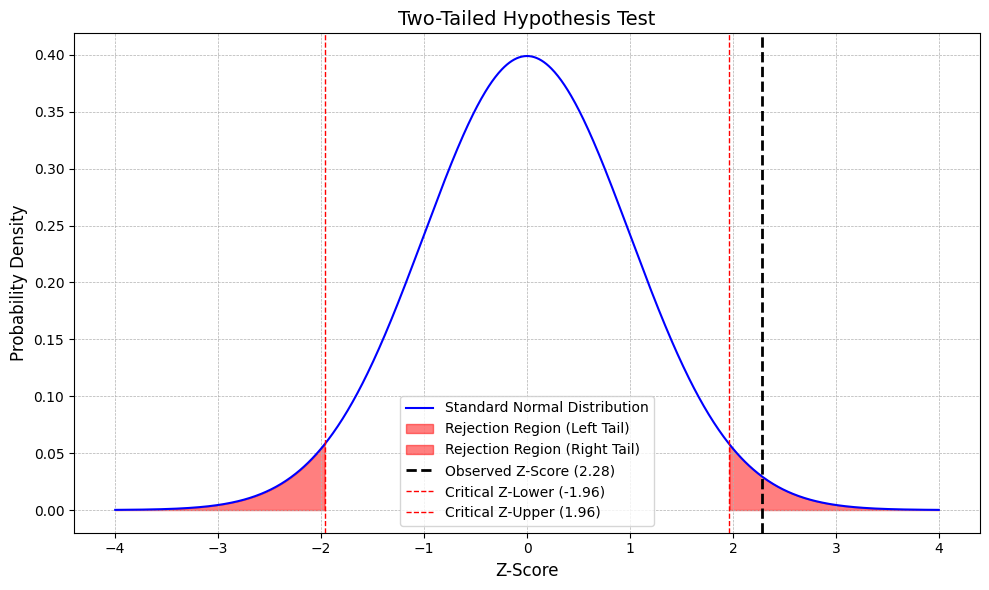

In [17]:
# Parameters
alpha = 0.05
mu = 50
x_bar = 50.5
sigma = 1.2
n = 30

# Critical z-scores
z_lower = norm.ppf(alpha / 2)      # Lower critical z-score
z_upper = norm.ppf(1 - alpha / 2)  # Upper critical z-score

# Observed z-score
observed_z = (x_bar - mu) / (sigma / sqrt(n))

# Create a range of z values for the plot
z = np.linspace(-4, 4, 1000)
pdf = norm.pdf(z)  # Standard normal PDF

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(z, pdf, label="Standard Normal Distribution", color='blue')

# Shade the rejection regions (alpha tails)
plt.fill_between(z, 0, pdf, where=(z < z_lower), color='red', alpha=0.5, label="Rejection Region (Left Tail)")
plt.fill_between(z, 0, pdf, where=(z > z_upper), color='red', alpha=0.5, label="Rejection Region (Right Tail)")

# Add a vertical dashed line for the observed z-score
plt.axvline(observed_z, color='black', linestyle='--', linewidth=2, label=f'Observed Z-Score ({observed_z:.2f})')

# Add vertical lines for the critical z-scores
plt.axvline(z_lower, color='red', linestyle='--', linewidth=1, label=f'Critical Z-Lower ({z_lower:.2f})')
plt.axvline(z_upper, color='red', linestyle='--', linewidth=1, label=f'Critical Z-Upper ({z_upper:.2f})')

# Title and labels
plt.title("Two-Tailed Hypothesis Test", fontsize=14)
plt.xlabel("Z-Score", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

**The toasters have a resistor of 48W. We take a sample of 100 toasters and look at the resistors
obtaining a sample mean of 46.5W. Let us assume that we have a known population standard deviation of 9.5,
following a normal distribution. The steps that we need to complete in hypothesis testing can be summarised as
follows:**

Hypothesis testing steps.
1. State the hypotheses and identify the claim. This helps
formulate H0 and Ha.
2. Find the critical value or values.
3. Compute the test value.
4. Decide whether to reject the null hypothesis or not.
5. Explain the result.

#### 1.

    • H0 : mu = 48
    • Ha : m != 48

In [20]:
# Parameters
alpha = 0.05
mu = 48
x_bar = 46.5
sigma = 9.5
n = 100

# Critical z-scores
z_lower = norm.ppf(alpha / 2)      # Lower critical z-score
z_upper = norm.ppf(1 - alpha / 2)  # Upper critical z-score

# Print the critical z-scores
print(f"Critical Z-Score (Lower): {z_lower:.2f}")
print(f"Critical Z-Score (Upper): {z_upper:.2f}\n")

# Observed z-score
observed_z = (x_bar - mu) / (sigma / sqrt(n))

print(f"Observed Z-Score: {observed_z:.2f}")

Critical Z-Score (Lower): -1.96
Critical Z-Score (Upper): 1.96

Observed Z-Score: -1.58


In [21]:
if observed_z < z_lower or observed_z > z_upper:
    print(f"The observed z-score ({observed_z:.2f}) is in the rejection region. Reject the null hypothesis.")
else:
    print(f"The observed z-score ({observed_z:.2f}) is NOT in the rejection region. Fail to reject the null hypothesis.")

The observed z-score (-1.58) is NOT in the rejection region. Fail to reject the null hypothesis.


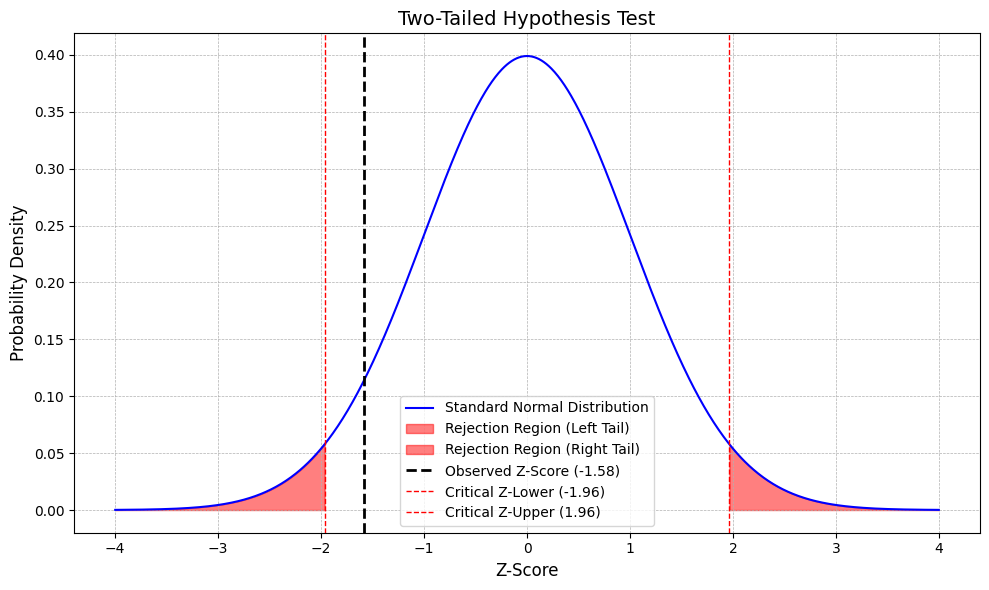

In [22]:
# Create a range of z values for the plot
z = np.linspace(-4, 4, 1000)
pdf = norm.pdf(z)  # Standard normal PDF

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(z, pdf, label="Standard Normal Distribution", color='blue')

# Shade the rejection regions (alpha tails)
plt.fill_between(z, 0, pdf, where=(z < z_lower), color='red', alpha=0.5, label="Rejection Region (Left Tail)")
plt.fill_between(z, 0, pdf, where=(z > z_upper), color='red', alpha=0.5, label="Rejection Region (Right Tail)")

# Add a vertical dashed line for the observed z-score
plt.axvline(observed_z, color='black', linestyle='--', linewidth=2, label=f'Observed Z-Score ({observed_z:.2f})')

# Add vertical lines for the critical z-scores
plt.axvline(z_lower, color='red', linestyle='--', linewidth=1, label=f'Critical Z-Lower ({z_lower:.2f})')
plt.axvline(z_upper, color='red', linestyle='--', linewidth=1, label=f'Critical Z-Upper ({z_upper:.2f})')

# Title and labels
plt.title("Two-Tailed Hypothesis Test", fontsize=14)
plt.xlabel("Z-Score", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
pval = 2*(1-norm.cdf(observed_z))

print(f'p-value: {pval}\n')

if pval < alpha:
    print(f"p-value ({pval:.2f}) < alpha ({alpha}). Reject the null hypothesis.")               # pval < 0.05
else:
    print(f"p-value ({pval:.2f}) > alpha ({alpha}). Fail to reject the null hypothesis.")       # pval > 0.05

p-value: 1.8856518702577993

p-value (1.89) > alpha (0.05). Fail to reject the null hypothesis.


# Q-Q plot

In [25]:
df = pd.read_csv('normal_skew.csv')  # https://figshare.com/articles/dataset/Normal_and_Skewed_Example_Data/17306285/1?file=31963403
df.head()

,normal_example,skewed_example
0,0.068676,2.023029
1,-0.143016,0.330508
2,-0.316584,0.140008
3,0.979202,0.255954
4,-0.739245,0.122830


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   normal_example  256 non-null    float64
 1   skewed_example  256 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


A **Q-Q plot (quantile-quantile plot)** is a graphical tool used to compare the distribution of a dataset against a theoretical distribution (e.g., normal distribution). It helps assess whether the data follows the specified distribution.

#### Key Components of a Q-Q Plot:

Quantiles:

    The plot compares the quantiles (percentiles) of the dataset to the quantiles of the theoretical distribution.
    Quantiles are points that divide the data into intervals of equal probability.

X-Axis (Theoretical Quantiles):

    The expected quantiles based on the theoretical distribution (e.g., a normal distribution).

Y-Axis (Sample Quantiles):

    The quantiles from the observed dataset.

Line (Reference Line):

    Represents perfect agreement between the dataset and the theoretical distribution. If the data follows the distribution, points will lie close to this line.

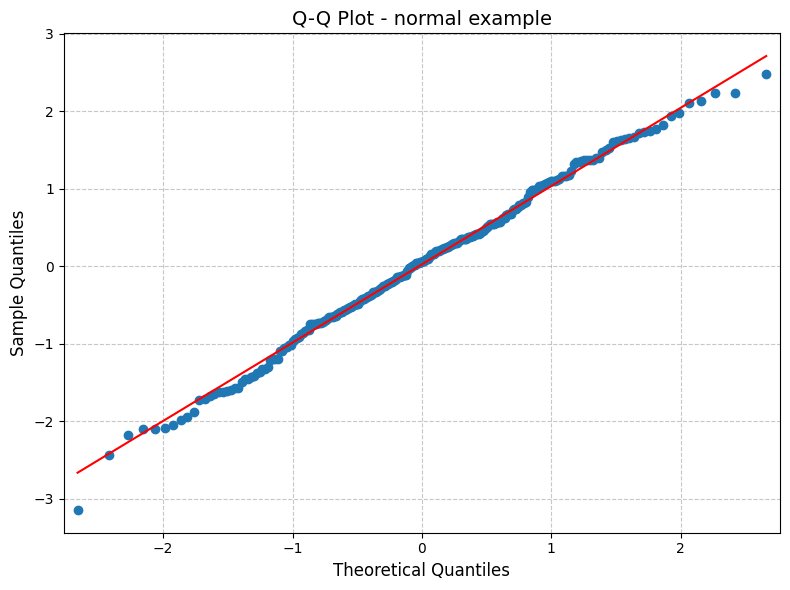

In [28]:
from statsmodels.graphics.gofplots import qqplot

# Q-Q plot using seaborn-friendly enhancements
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(df['normal_example'], line='s', ax=ax)             # Use statsmodels' qqplot function
ax.set_title('Q-Q Plot - normal example', fontsize=14)    # Add a title
ax.set_xlabel('Theoretical Quantiles', fontsize=12)       # Customize x-axis label
ax.set_ylabel('Sample Quantiles', fontsize=12)            # Customize y-axis label
plt.grid(visible=True, linestyle='--', alpha=0.7)         # Add a grid for better readability
plt.tight_layout()
plt.show()

#### How to Interpret a Q-Q Plot:

Points Follow the Line:

    The data closely matches the theoretical distribution.
    
Deviations from the Line:

    Tails Deviate:
        If points deviate at the ends, the dataset may have heavier or lighter tails than the theoretical distribution.
        
    Middle Deviates:
        Indicates a mismatch in central tendency or shape.
        
Upward/Downward Curve:

    Suggests skewness:
        Upward curve: Positive skew (right-skewed).
        Downward curve: Negative skew (left-skewed).

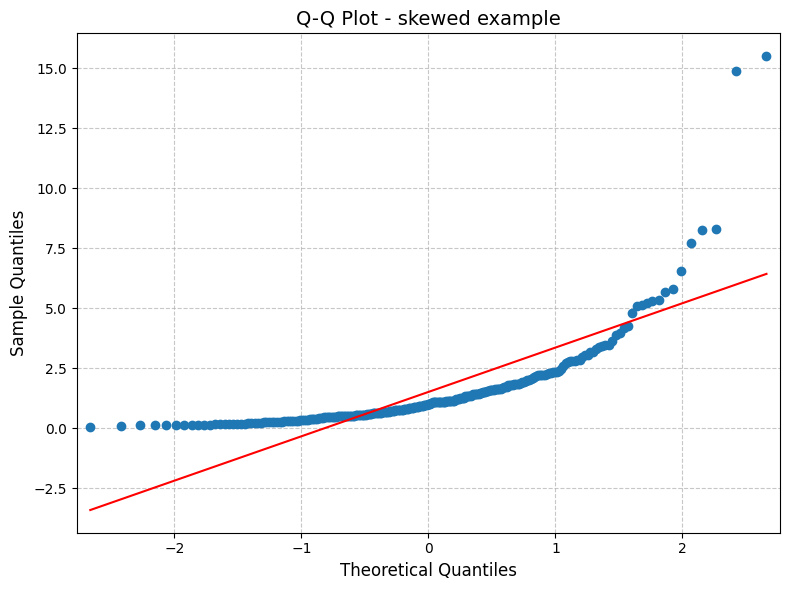

In [30]:
# Q-Q plot using seaborn-friendly enhancements
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(df['skewed_example'], line='s', ax=ax)             # Use statsmodels' qqplot function
ax.set_title('Q-Q Plot - skewed example', fontsize=14)    # Add a title
ax.set_xlabel('Theoretical Quantiles', fontsize=12)       # Customize x-axis label
ax.set_ylabel('Sample Quantiles', fontsize=12)            # Customize y-axis label
plt.grid(visible=True, linestyle='--', alpha=0.7)         # Add a grid for better readability
plt.tight_layout()
plt.show()

### Comparison

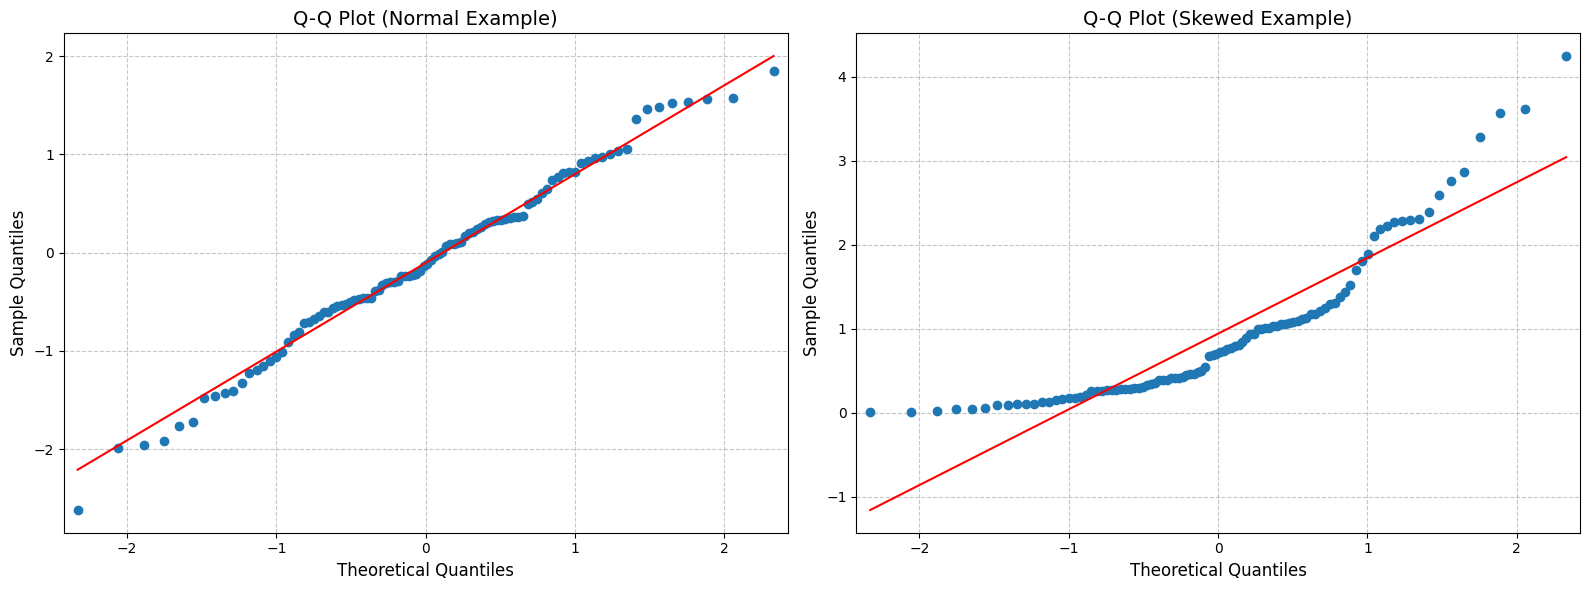

In [32]:
# Create example data for demonstration
np.random.seed(42)
df = pd.DataFrame({
    'normal_example': np.random.normal(0, 1, 100),           # Normally distributed data
    'skewed_example': np.random.exponential(1, 100)          # Skewed data
})

# Create a figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))              # 1 row, 2 columns

# First Q-Q Plot for 'normal_example'
qqplot(df['normal_example'], line='s', ax=axes[0])  # Use statsmodels' qqplot function
axes[0].set_title('Q-Q Plot (Normal Example)', fontsize=14)  # Add title
axes[0].set_xlabel('Theoretical Quantiles', fontsize=12)     # X-axis label
axes[0].set_ylabel('Sample Quantiles', fontsize=12)          # Y-axis label
axes[0].grid(visible=True, linestyle='--', alpha=0.7)        # Add grid

# Second Q-Q Plot for 'skewed_example'
qqplot(df['skewed_example'], line='s', ax=axes[1])           # Use statsmodels' qqplot function
axes[1].set_title('Q-Q Plot (Skewed Example)', fontsize=14)  # Add title
axes[1].set_xlabel('Theoretical Quantiles', fontsize=12)     # X-axis label
axes[1].set_ylabel('Sample Quantiles', fontsize=12)          # Y-axis label
axes[1].grid(visible=True, linestyle='--', alpha=0.7)        # Add grid

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test

The Shapiro-Wilk test is a statistical test used to assess whether a dataset follows a normal distribution.

#### Key Points:
    
           Null Hypothesis (𝐻0): The data is normally distributed.
    Alternative Hypothesis (𝐻𝑎): The data is not normally distributed.

Output:

    Test Statistic: Measures how well the data fits a normal distribution.
           p-value: Indicates whether the deviation from normality is statistically significant.
    
Decision Rule:

    If 𝑝 ≤ 𝛼, reject 𝐻0 (data is not normal).
    If 𝑝 > 𝛼, fail to reject 𝐻0 (data is normal).

In [35]:
from scipy.stats import shapiro

def shapiro_test(data, alpha=0.05):
    stat, p = shapiro(data)
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(stat, p))
    if p > alpha:
        print("Can’t Reject the null hypothesis. The data seems to be normally distributed.")
    else:
        print("Reject the null hypothesis. The data does not seem to be normally distributed.")

In [36]:
shapiro_test(df['normal_example'])

stat = 0.9899, p-value= 0.6552
Can’t Reject the null hypothesis. The data seems to be normally distributed.


In [37]:
shapiro_test(df['skewed_example'])

stat = 0.8406, p-value= 0.0000
Reject the null hypothesis. The data does not seem to be normally distributed.


# D’Agostino K-squared Test

The D’Agostino K-squared test is a statistical test used to determine whether a dataset follows a normal distribution.

#### Key Points:

           Null Hypothesis (𝐻0): The data is normally distributed.
    Alternative Hypothesis (𝐻𝑎): The data is not normally distributed.

Output:

    Test Statistic: Combines measures of skewness and kurtosis to assess normality.
           p-value: Indicates whether the deviation from normality is statistically significant.

Decision Rule:

    If 𝑝 ≤ 𝛼, reject 𝐻0 (data is not normal).
    If 𝑝 > 𝛼, fail to reject 𝐻0 (data is normal).

In [40]:
from scipy.stats import normaltest

def dagostino_test(data, alpha=0.05):
    k2, p = normaltest(data)
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(k2, p))
    if p > alpha:
        print("Can’t Reject the null hypothesis. The data seems to be normally distributed.")
    else:
        print("Reject the null hypothesis. The data does not seem to be normally distributed.")

In [41]:
dagostino_test(df['normal_example'])

stat = 0.5750, p-value= 0.7501
Can’t Reject the null hypothesis. The data seems to be normally distributed.


In [42]:
dagostino_test(df['skewed_example'])

stat = 32.0355, p-value= 0.0000
Reject the null hypothesis. The data does not seem to be normally distributed.


# Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov (K-S) test is a non-parametric test used to compare a dataset to a theoretical distribution or to compare two datasets.

#### Key Points:
    
Types:

    One-Sample K-S Test: Compares a dataset to a theoretical distribution (e.g., normal distribution).
    Two-Sample K-S Test: Compares two datasets to check if they come from the same distribution.

Null Hypothesis (𝐻0):

    One-Sample: The data follows the theoretical distribution.
    Two-Sample: The two datasets come from the same distribution.
        
Output:

    Test Statistic (D): Maximum difference between the cumulative distributions.
    p-value: Indicates whether the observed difference is statistically significant.
        
Decision Rule:

    If 𝑝 ≤ 𝛼, reject 𝐻0 (distributions are different).
    If 𝑝 > 𝛼, fail to reject 𝐻0 (distributions are the same).

In [45]:
from scipy.stats import kstest

def ks_test(data, alpha=0.05):
    d, p = kstest(data, 'norm')
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(d, p))
    if p > alpha:
        print("Can’t Reject the null hypothesis. The data seems to be normally distributed.")
    else:
        print("Reject the null hypothesis. The data does not seem to be normally distributed.")

In [46]:
ks_test(df['normal_example'])

stat = 0.1036, p-value= 0.2181
Can’t Reject the null hypothesis. The data seems to be normally distributed.


In [47]:
ks_test(df['skewed_example'])

stat = 0.5020, p-value= 0.0000
Reject the null hypothesis. The data does not seem to be normally distributed.


### Comparison of Normality Tests

| **Test**                | **Null Hypothesis (H0)**                     | **Purpose**                                                                 | **Best For**                                                                 | **Key Features**                                                                                  |
|-------------------------|--------------------------------------------------|----------------------------------------------------------------------------|----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| **Shapiro-Wilk Test**   | Data is normally distributed.                    | Assess normality by comparing the data to a normal distribution.           | Small to medium datasets.                                                  | Sensitive to small deviations from normality. Works well for smaller datasets (n < 50).       |
| **D’Agostino K-squared**| Data is normally distributed.                    | Uses skewness and kurtosis to evaluate normality.                          | Medium to large datasets.                                                  | Combines skewness and kurtosis into a single statistic. Best for datasets \(n > 50\).             |
| **Kolmogorov-Smirnov**  | Data follows the theoretical distribution (1-sample). | Compares data to a theoretical distribution or two datasets to each other. | One-sample: Compare to a theoretical distribution. Two-sample: Compare distributions of two datasets. | Non-parametric. Works for any distribution, but less sensitive to specific deviations in tails.   |


# Chi-square Test

#### Hypotheses

Let us then consider k different categories in our data and our hypotheses are as follows:

• H0 :

    – p1 - hypothesised proportion for category 1
    – p2 - hypothesised proportion for category 2
    – ...
    – pk - hypothesised proportion for category k

• Ha : 

    the null hypothesis is not true

#### Chi-Square Test Formula

The Chi-square test statistic is calculated as:

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

Where:
- $ O $: Observed frequency.
- $ E $: Expected frequency.

with degrees of freedom n = k − 1.

**A coin is flipped 100 times, and the results are recorded (observed frequencies = Heads: 60; Tails: 40). You suspect that the coin may not be fair and want to test this hypothesis using the Chi-square goodness-of-fit test. The expected frequencies for a fair coin would be equal (50 heads and 50 tails).**

In [52]:
from scipy.stats import chisquare

expected = [50, 50]                       # Expected frequencies for each category
observed = [60, 40]                       # Observed frequencies for each category

chisq, p = chisquare(observed, expected)  # Perform the Chi-square test for goodness-of-fit

print('stat = {0:.4f}, p-value= {1:.4f}'.format(chisq, p))  # Print the test statistic and p-value

stat = 4.0000, p-value= 0.0455


Interpretation:

    If p ≤ 0.05: Reject 𝐻0 (the coin is likely not fair).
    If p > 0.05: Fail to reject 𝐻0 (the coin is consistent with being fair).

In this case (0.0455 < 0.05), the coin is likely not fair.

**A company offers three product flavors: Vanilla, Chocolate, and Strawberry. Based on historical data, the company expects equal preferences among the three flavors (each getting 1/3 of the market share). However, in a survey of 150 customers, the observed preferences are:**

    Vanilla: 50
    Chocolate: 60
    Strawberry: 40

You want to test whether the observed preferences significantly differ from the expected preferences using the Chi-square goodness-of-fit test.

Hypotheses:

        Null Hypothesis (𝐻0): The observed preferences are consistent with the expected equal preferences.
    Alternative Hypothesis (𝐻𝑎): The observed preferences differ significantly from the expected equal preferences.

Inputs:

    Expected frequencies: [50,50,50] (for equal preferences among three flavors).
    Observed frequencies: [50,60,40] (from the survey).

In [55]:
expected = [50, 50, 50]                   # Expected frequencies for each category
observed = [50, 60, 40]                   # Observed frequencies for each category

chisq, p = chisquare(observed, expected)  # Perform the Chi-square test for goodness-of-fit

print('stat = {0:.4f}, p-value= {1:.4f}'.format(chisq, p))  # Print the test statistic and p-value

stat = 4.0000, p-value= 0.1353


Interpretation:

    If p ≤ 0.05: Reject 𝐻0 (the coin is likely not fair).
    If p > 0.05: Fail to reject 𝐻0 (the coin is consistent with being fair).

In this case (0.1353 > 0.05), This means there is no significant evidence to suggest the preferences for the three flavors differ from the expected equal distribution. The observed differences in preferences (50,60,40) can reasonably be explained by random variation.

**A higher 𝜒2 value would indicate how larger the differences are.**

In [58]:
from scipy.stats import chi2

# Parameters
df = 2        # Degrees of freedom (df = n - 1)
alpha = 0.05  # Significance level (95% of confidence)

# Calculate the critical value
critical_value = chi2.ppf(1 - alpha, df)
print(f"Critical Value: {critical_value:.3f}")

Critical Value: 5.991


    stat = 4.0000 < 5.991. The value is not large, meaning the observed differences are not statistically significant.

### Independence

The hypotheses are:

    • H0: Two variables are independent,
    • Ha: Two variables are not independent.

#### Table: Food Preferences of Officers

|               | **Tacos** | **Enchiladas** | **Chilaquiles** | **Total** |
|:-------------:|:---------:|:--------------:|:---------------:|----------:|
| **Senior Officers** |    125    |      93      |       38       |     256   |
| **Junior Officers** |    112    |      98      |       46       |     256   |
| **Total**            |    237    |     191      |       84       |     512   |

In [63]:
from scipy.stats import chi2_contingency

# Data
mexican = np.array([[125, 93, 38], [112, 98, 46]])              # chi2_contingency function from scipy.stats requires 
                                                                # a 2D numerical array as input (Numpy improves performance)
# Chi-square test function
def chi_indep(data, alpha=0.05):
    
    chisq, p, dof, exp_vals = chi2_contingency(data)            # Perform chi-square test
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(chisq, p))  # Print test statistic and p-value
    print()
    print('Expected values are:')                               # Print header for expected values
    print(exp_vals)                                             # Print expected frequencies
    print()
    
    if p > alpha:
        print("Can’t reject the null hypothesis. The samples seem to be independent.") # H0: Two variables are independent
    else:
        print("Reject the null hypothesis. The samples are not independent.")          # Ha: Two variables are not independent

# Run the function with the given data
chi_indep(mexican)

stat = 1.6059, p-value= 0.4480

Expected values are:
[[118.5  95.5  42. ]
 [118.5  95.5  42. ]]

Can’t reject the null hypothesis. The samples seem to be independent.


we conclude that we do not have sufficient evidence to say that there is an association between the rank of the officers and their preference for Mexican food.

### Note:

In [66]:
import numpy as np
from scipy.stats import chi2_contingency
import timeit

# List representation
mexican_list = [[125, 93, 38], [112, 98, 46]]

# Numpy array representation
mexican_array = np.array(mexican_list)

# Timing the Chi-Square test with a list
list_time = timeit.timeit(lambda: chi2_contingency(mexican_list), number=10000)

# Timing the Chi-Square test with a numpy array
array_time = timeit.timeit(lambda: chi2_contingency(mexican_array), number=10000)

print(f"Time with list: {list_time:.6f} seconds")
print(f"Time with numpy array: {array_time:.6f} seconds")


Time with list: 0.910124 seconds
Time with numpy array: 0.878397 seconds


For small datasets, using numpy does not provide a significant performance boost. However, for larger datasets or operations requiring matrix manipulations, numpy's efficiency becomes critical.